t !git clone https://github.com/LuisM78/Appliances-energy-prediction-data
 

In [39]:
!git clone https://github.com/cjc1234567890/Appliances-energy-prediction-data.git

Cloning into 'energydata_complete.csv'...
fatal: repository 'https://github.com/LuisM78/Appliances-energy-prediction-data/blob/master/energydata_complete.csv/' not found


(10000, 28, 28) (10000,)


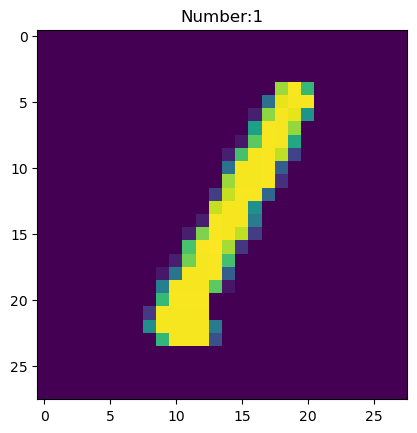

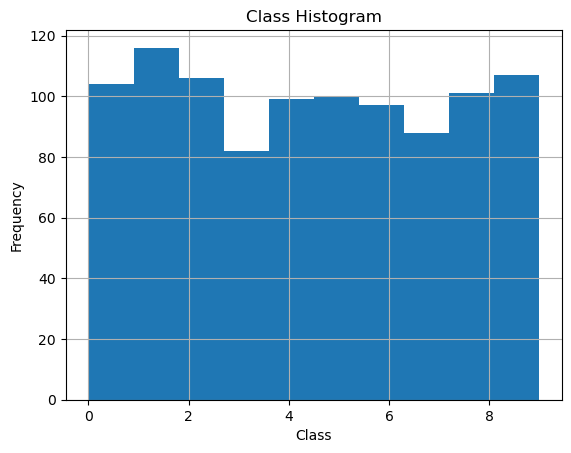

In [152]:
# 2.1
from keras.datasets.mnist import  load_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

_, (images, labels) = load_data()
print(images.shape, labels.shape)

subData= torch.randperm(len(images))[:1000]
img=images[subData]
classes=labels[subData]

plt.imshow(img[0])
plt.title(f'Number:{classes[0]}')
plt.show()


#Histogram plot
plt.figure()
plt.title('Class Histogram')

plt.hist(classes)
plt.xlabel('Class')
plt.ylabel('Frequency') 
plt.grid()











In general, as the Press mm_Hg increases, the appliance energy consumption also increases.


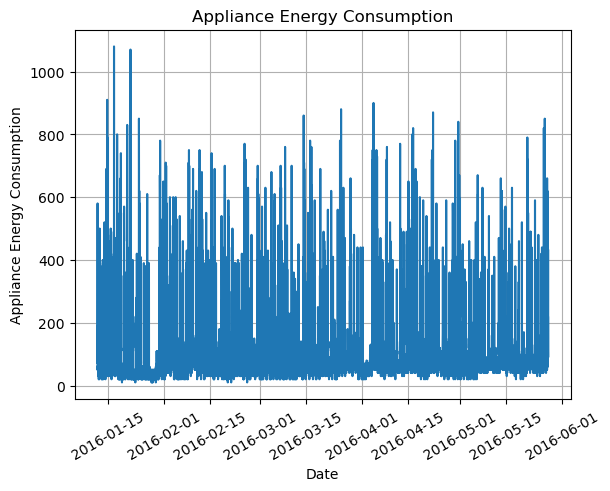

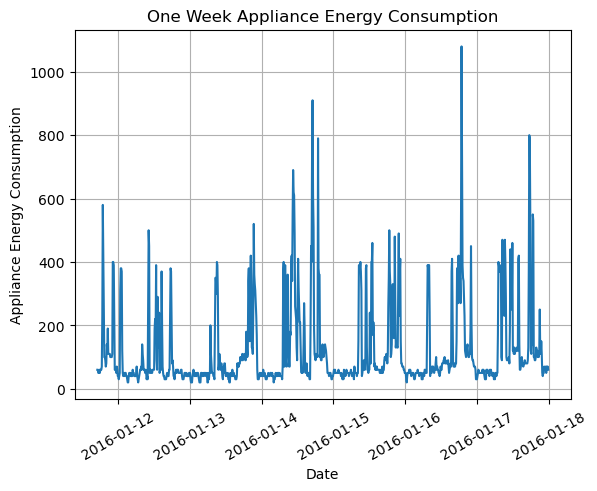

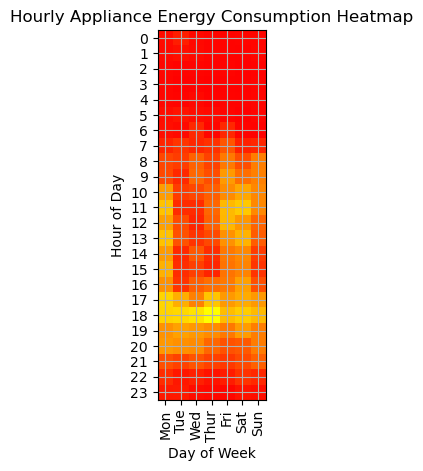

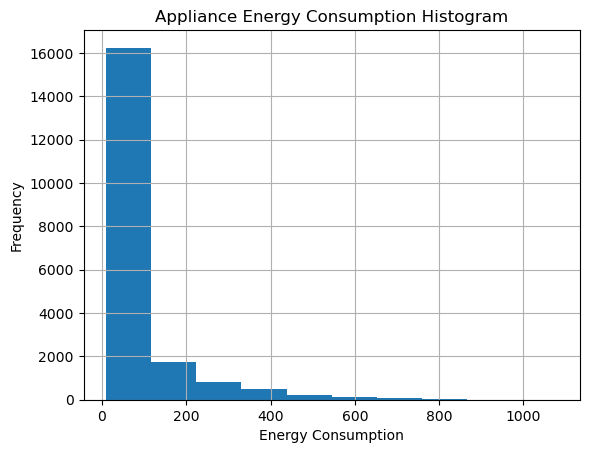

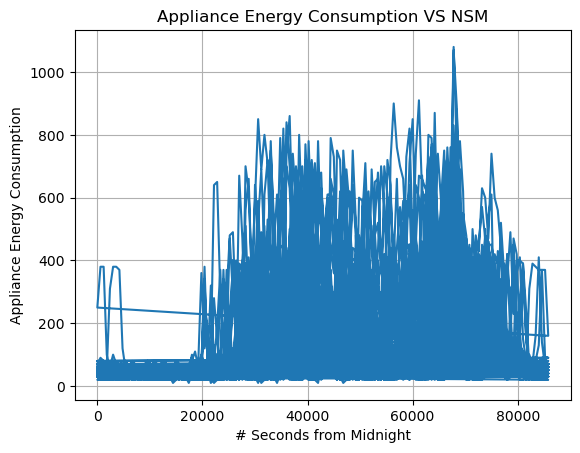

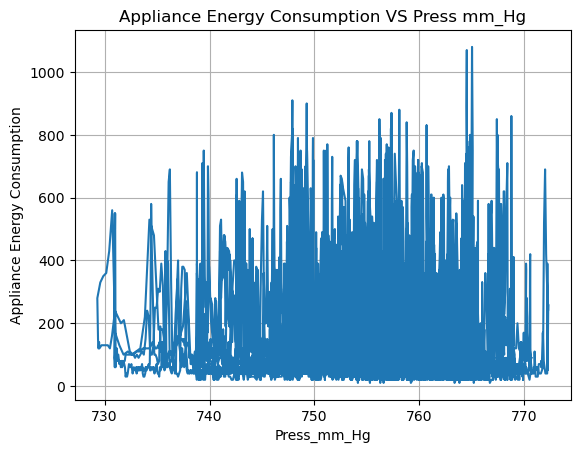

In [153]:
#2.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

energyData = pd.read_csv('/home/exouser/ME592_Spring2024/Assignment_1/Appliances-energy-prediction-data/energydata_complete.csv')
energyData['date'] = pd.to_datetime(energyData['date'])  # Convert 'Date' to datetime

#Full date vs appliance plot
plt.figure()
plt.title('Appliance Energy Consumption')
plt.xticks(rotation=30)
plt.plot(energyData['date'],energyData['Appliances'])
plt.grid()
plt.xlabel('Date')
plt.ylabel('Appliance Energy Consumption')


#month date vs appliance plot
weekData=energyData[(energyData['date']>='2016-01-11') & (energyData['date']<'2016-01-18')]

plt.figure()
plt.title('One Week Appliance Energy Consumption')
plt.xticks(rotation=30)
plt.plot(weekData['date'],weekData['Appliances'])
plt.grid()
plt.xlabel('Date')
plt.ylabel('Appliance Energy Consumption')

#hourly heat map
hourlyData=energyData.pivot_table(index=energyData['date'].dt.hour, columns=energyData['date'].dt.dayofweek, values='Appliances')

plt.figure()
plt.title('Hourly Appliance Energy Consumption Heatmap')
plt.imshow(hourlyData, cmap='autumn')
plt.grid()
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(range(7),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.yticks(range(24))
plt.xticks(rotation=90)


#histogram of energy consumption
plt.figure()
plt.title('Appliance Energy Consumption Histogram')

plt.hist(energyData['Appliances'])
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency') 
plt.grid()

#NSM VS Appliance Consumption
nsm=(energyData['date']-energyData['date'].dt.normalize()) // pd.Timedelta(seconds=1)

plt.figure()
plt.title('Appliance Energy Consumption VS NSM')
plt.plot(nsm,energyData['Appliances'])
plt.grid()
plt.xlabel('# Seconds from Midnight')
plt.ylabel('Appliance Energy Consumption')

#Appliance consumption vs mm_Hg
plt.figure()
plt.title('Appliance Energy Consumption VS Press mm_Hg')
plt.plot(energyData['Press_mm_hg'],energyData['Appliances'])
plt.grid()
plt.xlabel('Press_mm_Hg')
plt.ylabel('Appliance Energy Consumption')

#Discuss trend
print("In general, as the Press mm_Hg increases, the appliance energy consumption also increases.")


In [154]:
#2.3
import pandas as pd
from scipy.stats import kurtosis, skew

NasaData = pd.read_csv('/home/exouser/ME592_Spring2024/Assignment_1/airfoil_self_noise.dat',delimiter='\t')

NasaData.columns = ["Frequency", "Angle", "Length", "Velocity", "Displacement", "Sound"]

mean=NasaData.mean()
variance=NasaData.var()
SD=NasaData.std()
median=NasaData.median()
kurtosis=kurtosis(NasaData)
skew=skew(NasaData)




print('mean:\n',mean)
print('\n')
print('variance:\n',variance)
print('\n')
print('standard deviation:\n',SD)
print('\n')
print('median:\n',median)
print('\n')
print('kurtosis:\n',kurtosis)
print('\n')
print('skewness:\n',skew)

mean:
 Frequency       2887.769640
Angle              6.786818
Length             0.136436
Velocity          50.847137
Displacement       0.011146
Sound            124.835034
dtype: float64


variance:
 Frequency       9.942437e+06
Angle           3.501691e+01
Length          8.736825e-03
Velocity        2.423947e+02
Displacement    1.729960e-04
Sound           4.762193e+01
dtype: float64


standard deviation:
 Frequency       3153.162983
Angle              5.917509
Length             0.093471
Velocity          15.569029
Displacement       0.013153
Sound              6.900864
dtype: float64


median:
 Frequency       1600.000000
Angle              5.400000
Length             0.101600
Velocity          39.600000
Displacement       0.004957
Sound            125.719000
dtype: float64


kurtosis:
 [ 5.68112056 -0.41601575 -1.03614243 -1.56155226  2.2039227  -0.31899897]


skewness:
 [ 2.13404609  0.68786507  0.45803932  0.23705974  1.69949635 -0.41802101]
